# Lab Machine Learning
# Simran Kaur
# 311443
# Exercise 3

# Exercise 1: Gradient Descent on Rosenbrock function

In [1]:
from mpl_toolkits import mplot3d

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Parameters:-

In [3]:
a = 1
b = 100

Rosenbrock Function

In [4]:
def func(x, y):
    return (a - x)**2 + b*((y - x**2)**2)


3D Plot of the Rosenbrock Function

Text(0.5, 0, 'z')

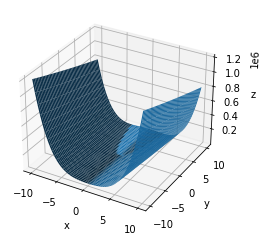

In [5]:
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

$f(x,y) = {(a-x)^2 + b(y - x^2)^2}$

Partial gradient:

$\frac{\partial f}{\partial x} = {2(x-a) - 4bx(y - x^2)}$

$\frac{\partial f}{\partial y} = {2b(y - x^2)}$

In [24]:
def grad(x, y):
    f_x = 2*(x-a) - 4*b*x*(y - x**2)
    f_y = 2*b*(y - x**2)
    return f_x, f_y 

Optimizing the function with Gradient Descent. Here we will use different values of the step length alpha by hit and trial to minimize this function.

In [27]:
def grad_descent(x, y, alpha, n_iter):
    l = np.zeros((n_iter,2))
    for i in range(n_iter):
        x_n = x - alpha*(grad(x, y)[0])
        y_n = y - alpha*(grad(x, y)[1])
        x, y = x_n, y_n
        l[i] = [x,y]
    return l  

In [28]:
l = grad_descent(3, 7, 10**(-5), 10000000)
l

array([[2.97596   , 7.004     ],
       [2.95387055, 7.00770468],
       [2.93353665, 7.01113997],
       ...,
       [1.        , 1.        ],
       [1.        , 1.        ],
       [1.        , 1.        ]])

Text(0.5, 0, 'z')

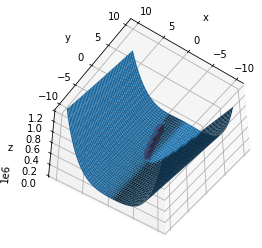

In [29]:
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)

xx = l[:,0]
yy = l[:,1]
zz = func(xx,yy)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)
ax.view_init(elev=-50., azim=55.)
ax.plot(xx, yy, 'ro', alpha=0.5) # note the 'ro' (no '-') and the alpha

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Exercise 2: Linear Regression with Gradient Descent

# Part A: (Datasets)

In [11]:
import pandas as pd

In [13]:
file = open("airq402.txt", 'r')
file.read()

'Dataset:   airq402.dat\n\nSource: U.S. Department of Transportation\n\nDescription: Airfsres and passengers for U.S. Domestic Routes\nfor 4th Quarter of 2002.\n\nVariables/Columns\n\nCity1   1-3\nCity2   5-7\nAverage Fare    11-17\nDistance      20-23\nAverage weekly passengers   26-33\nmarket leading airline    36-37\nmarket share     40-45\nAverage fare    48-54\nLow price airline   57-58\nmarket share    61-66\nprice     69-75'

Reading the three Data Files using Pandas

In [30]:
wine_quality = pd.read_csv("winequality-red.csv",sep=";")
airfare_pr = pd.read_fwf("airq402.data", header=None, names=["City1", "City2", "Average Fare1", "Distance", "Average weekly passengers", "market leading airline", "market share1", "Average fare2", "Low price airline", "market share2", "price"])
parkisons = pd.read_csv("parkinsons_updrs.data", sep=",")

This is how the dataframes look:

In [5]:
wine_quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [31]:
airfare_pr

,City1,City2,Average Fare1,Distance,Average weekly passengers,market leading airline,market share1,Average fare2,Low price airline,market share2,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
...,...,...,...,...,...,...,...,...,...,...,...
995,SYR,TPA,136.16,1104,184.34,US,33.37,135.82,DL,28.65,118.51
996,TLH,TPA,83.28,200,232.71,FL,99.57,82.55,FL,99.57,82.55
997,TPA,IAD,159.97,814,843.80,US,46.19,159.65,DL,13.89,159.02
998,TPA,PBI,73.57,174,214.45,WN,99.74,73.44,WN,99.74,73.44


Converting Non-numeric values in the columns City, Market leading airline and Low Price airline to numerical values using Pandas get_dummies.

In [32]:
airfare_price = pd.get_dummies(airfare_pr)
airfare_price

,Average Fare1,Distance,Average weekly passengers,market share1,Average fare2,market share2,price,City1_ABQ,City1_ACY,City1_ALB,...,Low price airline_G4,Low price airline_HP,Low price airline_NK,Low price airline_NW,Low price airline_SY,Low price airline_TZ,Low price airline_UA,Low price airline_US,Low price airline_WN,Low price airline_YX
0,114.47,528,424.56,70.19,111.03,70.19,111.03,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,122.47,860,276.84,75.10,123.09,17.23,118.94,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,214.42,852,215.76,78.89,223.98,2.77,167.12,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,69.40,288,606.84,96.97,68.86,96.97,68.86,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,158.13,723,313.04,39.79,161.36,15.34,145.42,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,136.16,1104,184.34,33.37,135.82,28.65,118.51,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,83.28,200,232.71,99.57,82.55,99.57,82.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,159.97,814,843.80,46.19,159.65,13.89,159.02,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,73.57,174,214.45,99.74,73.44,99.74,73.44,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [39]:
parkisons

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


Checking out if any of the rows have missing or null values.

In [37]:
Wq_null = wine_quality.isnull()
if_row_null_Wq = Wq_null.any(axis = 1)
row_null_Wq = wine_quality[if_row_null_Wq]
row_null_Wq

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [38]:
Ap_null = airfare_price.isnull()
if_row_null_Ap = Ap_null.any(axis = 1)
row_null_Ap = airfare_price[if_row_null_Ap]
row_null_Ap

,Average Fare1,Distance,Average weekly passengers,market share1,Average fare2,market share2,price,City1_ABQ,City1_ACY,City1_ALB,...,Low price airline_G4,Low price airline_HP,Low price airline_NK,Low price airline_NW,Low price airline_SY,Low price airline_TZ,Low price airline_UA,Low price airline_US,Low price airline_WN,Low price airline_YX


In [40]:
p_null = parkisons.isnull()
if_row_null_p = p_null.any(axis = 1)
row_null_p = parkisons[if_row_null_p]
row_null_p

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE


None of the dataframes above has zero or null rows. So there is no row that we can remove.

Splitting the dataset into 80% training data and 20% test data.

In [41]:
def split(file):
    r, c = np.shape(file)
    size = int(0.8*r)
    train = file.iloc[0:size]
    test = file.iloc[size :]
    return train, test

If there any columns that can be removed.

In [94]:
winequality_corr = wine_quality.corr(method = 'pearson')
winequality_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [95]:
airfare_corr = airfare_price.corr(method = 'pearson')
airfare_corr

,Average Fare1,Distance,Average weekly passengers,market share1,Average fare2,market share2,price,City1_ABQ,City1_ACY,City1_ALB,...,Low price airline_G4,Low price airline_HP,Low price airline_NK,Low price airline_NW,Low price airline_SY,Low price airline_TZ,Low price airline_UA,Low price airline_US,Low price airline_WN,Low price airline_YX
Average Fare1,1.000000,0.587169,-0.126175,-0.234142,0.981462,-0.458660,0.866410,-0.015512,-0.043395,-0.024907,...,-0.023987,0.120318,-0.060285,0.070318,0.045435,0.032484,0.157407,0.135060,-0.383648,0.019288
Distance,0.587169,1.000000,-0.090131,-0.531406,0.564082,-0.367831,0.583239,-0.019194,-0.012393,0.026510,...,-0.022292,0.131914,0.024836,0.040402,0.046385,0.042391,0.016713,-0.027004,-0.218735,-0.014731
Average weekly passengers,-0.126175,-0.090131,1.000000,-0.067605,-0.100946,0.034241,-0.142314,-0.046326,-0.027180,-0.041919,...,-0.015980,-0.010447,0.136523,-0.056569,0.012058,0.225821,-0.088678,-0.067905,0.020247,-0.018707
market share1,-0.234142,-0.531406,-0.067605,1.000000,-0.220801,0.306832,-0.307672,0.039731,0.123685,-0.020080,...,-0.008562,-0.012376,-0.006541,-0.059734,0.000750,-0.135279,0.070145,0.056783,0.140842,-0.010773
Average fare2,0.981462,0.564082,-0.100946,-0.220801,1.000000,-0.472838,0.826511,-0.019783,-0.041540,-0.022720,...,-0.037346,0.116697,-0.064026,0.071489,0.057073,0.052165,0.159428,0.119931,-0.377977,0.016795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Low price airline_TZ,0.032484,0.042391,0.225821,-0.135279,0.052165,-0.085219,-0.057155,-0.025400,-0.011889,-0.016848,...,-0.005936,-0.046552,-0.023923,-0.034657,-0.015752,1.000000,-0.045260,-0.062883,-0.102534,-0.010291
Low price airline_UA,0.157407,0.016713,-0.088678,0.070145,0.159428,-0.120865,0.108960,-0.032662,-0.015289,-0.021665,...,-0.007633,-0.059862,-0.030763,-0.044567,-0.020255,-0.045260,1.000000,-0.080862,-0.131851,-0.013234
Low price airline_US,0.135060,-0.027004,-0.067905,0.056783,0.119931,-0.054411,0.083681,-0.045380,-0.021241,0.007153,...,-0.010605,-0.083171,-0.042741,-0.061919,-0.028142,-0.062883,-0.080862,1.000000,-0.183189,-0.018386
Low price airline_WN,-0.383648,-0.218735,0.020247,0.140842,-0.377977,0.407897,-0.319557,0.068990,-0.034635,0.057616,...,-0.017292,-0.135615,-0.069692,-0.100963,-0.045887,-0.102534,-0.131851,-0.183189,1.000000,-0.029980


In [96]:
parkisons_corr = parkisons.corr(method = 'pearson')
parkisons_corr

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
subject#,1.000000,-0.030864,0.286851,-0.000882,0.252919,0.253643,0.135448,0.075156,0.120339,0.136474,...,0.142864,0.112950,0.138264,0.173333,0.112949,0.168743,-0.206929,0.147300,0.097464,0.157559
age,-0.030864,1.000000,-0.041602,0.019884,0.273665,0.310290,0.023071,0.035691,0.010255,0.013199,...,0.111130,0.098912,0.089983,0.135238,0.098913,0.007093,-0.104842,0.090208,-0.092870,0.120790
sex,0.286851,-0.041602,1.000000,-0.009805,-0.031205,-0.096559,0.051422,-0.154645,0.076718,0.087995,...,0.056481,0.044937,0.064819,0.023360,0.044938,0.168170,-0.000167,-0.159262,-0.165113,-0.099901
test_time,-0.000882,0.019884,-0.009805,1.000000,0.067918,0.075263,-0.022837,-0.011365,-0.028888,-0.023290,...,-0.030962,-0.029020,-0.036504,-0.039110,-0.029017,-0.026357,0.036545,-0.038887,0.019261,-0.000563
motor_UPDRS,0.252919,0.273665,-0.031205,0.067918,1.000000,0.947231,0.084816,0.050903,0.072684,0.076291,...,0.110076,0.084261,0.092105,0.136560,0.084260,0.074967,-0.157029,0.128607,-0.116242,0.162433
total_UPDRS,0.253643,0.310290,-0.096559,0.075263,0.947231,1.000000,0.074247,0.066927,0.064015,0.063352,...,0.098790,0.079363,0.083467,0.120838,0.079363,0.060952,-0.162117,0.156897,-0.113475,0.156195
Jitter(%),0.135448,0.023071,0.051422,-0.022837,0.084816,0.074247,1.000000,0.865577,0.984181,0.968214,...,0.716704,0.664149,0.694002,0.645965,0.664147,0.825294,-0.675188,0.427128,0.226550,0.721849
Jitter(Abs),0.075156,0.035691,-0.154645,-0.011365,0.050903,0.066927,0.865577,1.000000,0.844626,0.790538,...,0.655871,0.623830,0.621401,0.589998,0.623827,0.699960,-0.706418,0.547100,0.352264,0.787853
Jitter:RAP,0.120339,0.010255,0.076718,-0.028888,0.072684,0.064015,0.984181,0.844626,1.000000,0.947196,...,0.685551,0.650226,0.659831,0.603082,0.650225,0.792373,-0.641473,0.382891,0.214881,0.670652
Jitter:PPQ5,0.136474,0.013199,0.087995,-0.023290,0.076291,0.063352,0.968214,0.790538,0.947196,1.000000,...,0.734591,0.676711,0.734021,0.668413,0.676710,0.864864,-0.662409,0.381503,0.175359,0.663491


In the above three datasets if the correlation between the columns of the dataframe with the target vector column have values between -0.3 and +0.3, then the columns are weakly correlated with the target column and hence can also be removed as they do not significantly contribute to the target,

# Part B: Linear Regression with Real-World Data

Loss function

In [42]:
def loss(X, Y, beta):
    m, n = np.shape(X)
    sum = 0
    for i in range(m):
        sum += (Y[i] - np.dot(X[i], beta))**2
    return sum

Gradient of the Loss Function

In [43]:
def grad_loss(X, Y, beta):
    m, n = np.shape(X)
    grad = np.zeros(n)
    for k in range(n):
        s = 0
        for i in range(m):
            s += (-2)*(Y[i] - np.dot(X[i], beta))*X[i][k]
        grad[k] = s
    return grad

Gradient Descent function

In [44]:
def grad_descent(X, Y, x_t, y_t, beta, alpha, i_max):
    n= np.size(beta)
    m = np.size(y_t)
    diff = np.zeros(i_max)
    Rmse = np.zeros(i_max)
    beta_n = np.zeros(n)
    for i in range(i_max):
        sum = 0
        for j in range(n):
            beta_n[j] = beta[j] - (alpha*(grad_loss(X, Y, beta)[j]))
        diff[i] = abs(loss(X, Y, beta) - loss(X, Y, beta_n))
        for k in range(m):
            sum += (np.dot(x_t[k], beta_n) - y_t[k])**2
        Rmse[i] = np.sqrt(sum/m)    
        beta = np.array(beta_n)
    return beta_n, diff, Rmse

Extracting $X^{train}$, $Y^{train}$, $X^{test}$ and $Y^{test}$ from our dataframes

In [45]:
def Extract(f, col_name):
    train, test = split(f)
    r, c = np.shape(train)
    x_train = train.loc[:, train.columns != col_name]
    x_train = x_train.to_numpy()
    bias_column1 = np.ones(shape=(r,1))
    X_train = np.append(bias_column1,x_train,axis=1)
    y_train = train.loc[:, train.columns == col_name]
    Y_train = y_train.to_numpy()
    k, l = np.shape(test)
    x_test = test.loc[:, test.columns != col_name]
    x_test = x_test.to_numpy()
    bias_column2 = np.ones(shape=(k,1))
    X_test = np.append(bias_column2,x_test,axis=1)
    y_test = test.loc[:, test.columns == col_name]
    Y_test = y_test.to_numpy()
    return X_train, Y_train, X_test, Y_test

# Linear Regression using Gradient descent For the Wine_quality dataframe

Putting the dataframe in the Extract function above to get training and test datasets.

In [46]:
Wq_train_features, Wq_train_target, Wq_test_features, Wq_test_target = Extract(wine_quality, "quality")

Choice for alpha $10^{-5}, 10^{-7}$ and $10^{-9}$

By hit and trial, the best value found for alpha is as given below:

In [52]:
alpha1 = 10**(-7)
Wq_rows, Wq_col = np.shape(Wq_train_features)
beta_Wq = np.zeros(Wq_col)
beta_pred_Wq, abs_difference_Wq, RMSE_Wq = grad_descent(Wq_train_features, Wq_train_target, Wq_test_features, Wq_test_target, beta_Wq, alpha1, 500)

After performing the iterations for 500 times we get the following value for beta.

In [53]:
beta_pred_Wq

array([ 0.02891247,  0.20781084,  0.01143929,  0.00645014,  0.04829093,
        0.00225899,  0.01137366, -0.00332255,  0.02876486,  0.09743182,
        0.02084436,  0.31882271])

Plotting the predicted target vector and actual target vector shows that in the prediction vector more values are clustered around the points of the target vector which occurs most often.

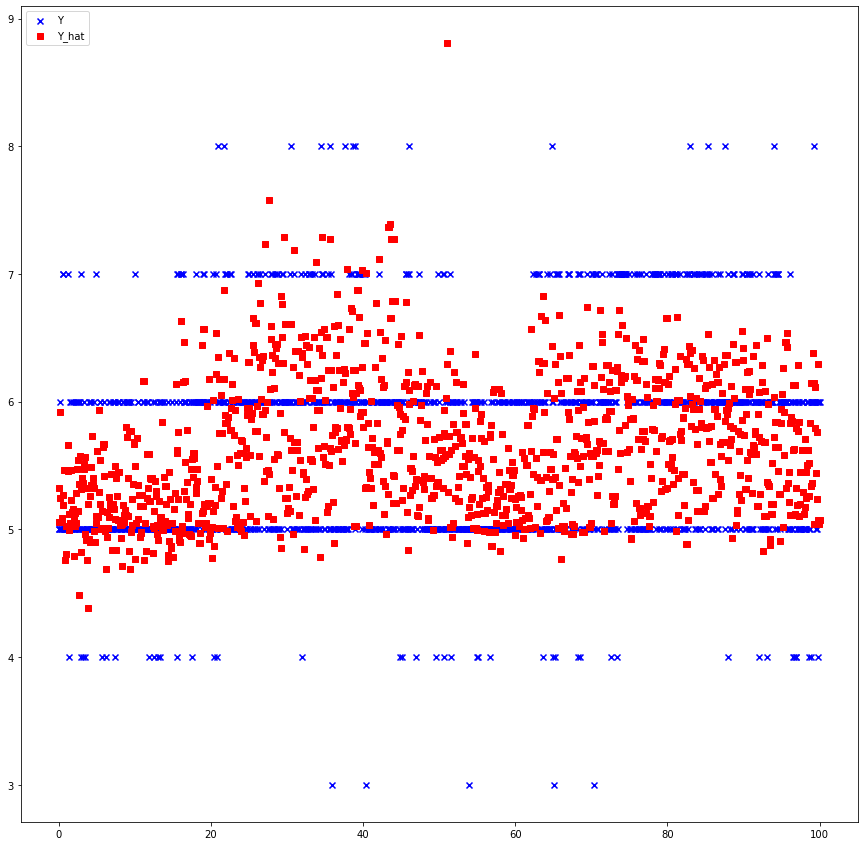

In [54]:
Wq_train_target_pred = np.dot(Wq_train_features, beta_pred_Wq)
Wq_train_target_ = np.reshape(Wq_train_target, np.shape(Wq_train_target_pred))
fig = plt.figure(figsize=(15,15))
axis = np.linspace(0, 100, 1279)
ax = fig.add_subplot(111)
ax.scatter(axis, Wq_train_target_, c='b', marker='x', label='Y')
ax.scatter(axis, Wq_train_target_pred, c='r', marker='s', label='Y_hat')
ax.legend(loc='upper left')
plt.show()


With each iteration, the absolute difference between the values of loss function at previous and present calculated values of beta is decreasing. Hence beta is getting better after each iteration.

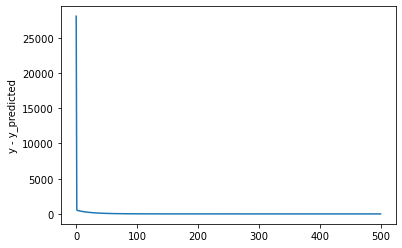

In [55]:
abs_Wq = abs_difference_Wq     
plt.plot(abs_Wq)
plt.ylabel('y - y_predicted')
plt.show()

With each iteration, the root mean square error of the loss function at previous and present calculated values of beta is decreasing.
Hence beta is getting better after each iteration.

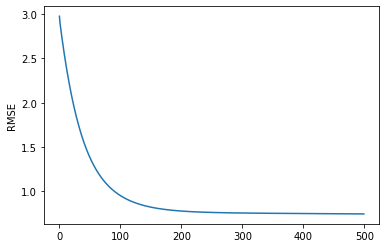

In [56]:
Wq_y = RMSE_Wq       
plt.plot(Wq_y)
plt.ylabel('RMSE')
plt.show()

# Linear Regression using Gradient descent For the airfare_Price dataframe

# While submitting the file Airfare dataframe was taking too much time so couldn't run. Otherwise the code is fine.

Putting the dataframe in the Extract function above to get training and test datasets.

In [57]:
Ap_train_features, Ap_train_target, Ap_test_features, Ap_test_target = Extract(airfare_price, "price")

By hit and trial, the best value found for alpha is as given below:

In [97]:
alpha2 = 10**(-9)
Ap_rows, Ap_col = np.shape(Ap_train_features)
beta_Ap = np.zeros(Ap_col)
beta_pred_Ap, abs_difference_Ap, RMSE_Ap = grad_descent(Ap_train_features, Ap_train_target, Ap_test_features, Ap_test_target, beta_Ap, alpha2, 100)

KeyboardInterrupt: 

After performing the iterations for 100 times we get the following value for beta.

In [ ]:
beta_pred_Ap

Plotting the predicted target vector and actual target vector shows that in the prediction vector more values are clustered around the points of the target vector which occurs most often.

In [ ]:
Ap_train_target_pred = np.dot(Ap_train_features, beta_pred_Ap)
Ap_train_target_ = np.reshape(Ap_train_target, np.shape(Ap_train_target_pred))
fig = plt.figure(figsize=(15,15))
axis = np.linspace(0, 100, 800)
ax = fig.add_subplot(111)
ax.scatter(axis, Ap_train_target_, c='b', marker='x', label='Y')
ax.scatter(axis, Ap_train_target_pred, c='r', marker='s', label='Y_hat')
ax.legend(loc='upper left')
plt.show()

With each iteration, the absolute difference between the values of loss function at previous and present calculated values of beta is decreasing. Hence beta is getting better after each iteration.

In [ ]:
abs_Ap = abs_difference_Ap   
plt.plot(abs_Ap)
plt.ylabel('y - y_predicted')
plt.show()

With each iteration, the root mean square error of the loss function at previous and present calculated values of beta is decreasing.
Hence beta is getting better after each iteration.

In [ ]:
Ap_y = RMSE_Ap       
plt.plot(ap_y)
plt.ylabel('RMSE')
plt.show()

# Linear Regression using Gradient descent For the parkisons dataframe

Putting the dataframe in the Extract function above to get training and test datasets.

In [61]:
p_train_features, p_train_target, p_test_features, p_test_target = Extract(parkisons, "total_UPDRS")

By hit and trial, the best value found for alpha is as given below:

In [69]:
alpha3 = 10**(-8)
p_rows, p_col = np.shape(p_train_features)
beta_p = np.zeros(p_col)
beta_pred_p, abs_difference_p, RMSE_p = grad_descent(p_train_features, p_train_target, p_test_features, p_test_target, beta_p, alpha3, 100)

After performing the iterations for 100 times we get the following value for beta.

In [71]:
beta_pred_p

array([ 2.88547579e-03,  4.02529123e-02,  2.47513651e-01, -5.42070036e-03,
        1.61993308e-03,  5.01109983e-01,  3.80098107e-05,  3.51025871e-07,
        1.97184808e-05,  1.93572367e-05,  5.91505059e-05,  1.69234130e-04,
        1.54753891e-03,  8.68010832e-05,  1.01451286e-04,  1.44391147e-04,
        2.60408346e-04,  2.20005322e-04,  1.97025700e-02,  3.24932075e-03,
        1.06304214e-03,  1.26914631e-03])

Plotting the predicted target vector and actual target vector shows that in the prediction vector more values are clustered around the points of the target vector which occurs most often.

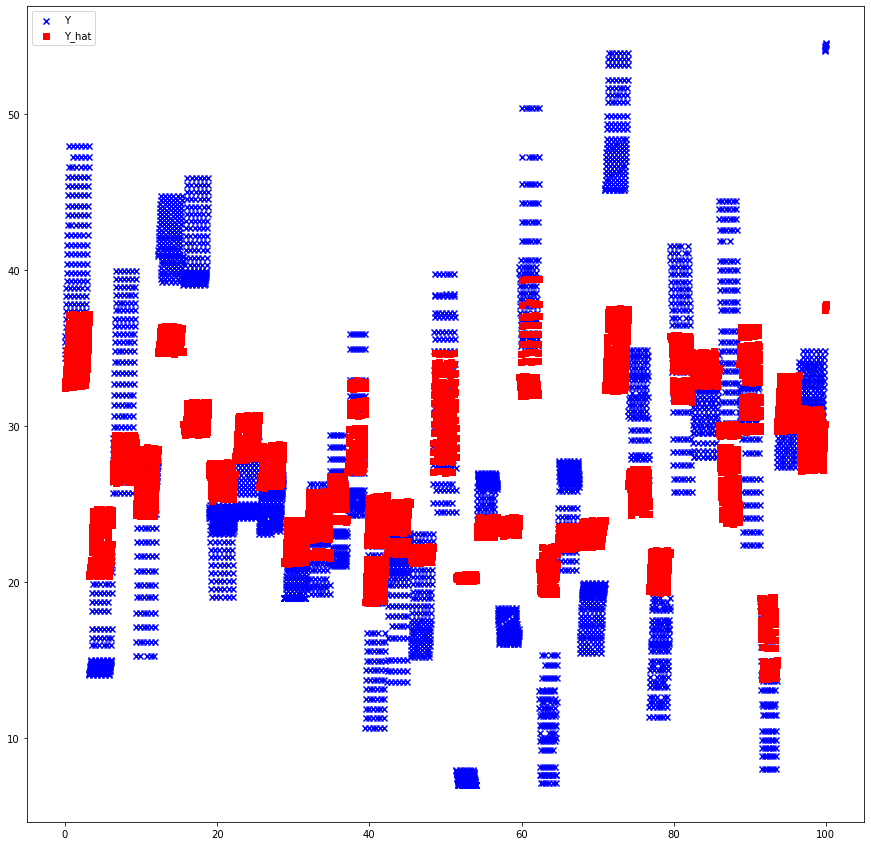

In [72]:
p_train_target_pred = np.dot(p_train_features, beta_pred_p)
p_train_target_ = np.reshape(p_train_target, np.shape(p_train_target_pred))
fig = plt.figure(figsize=(15,15))
axis = np.linspace(0, 100, 4700)
ax = fig.add_subplot(111)
ax.scatter(axis, p_train_target_, c='b', marker='x', label='Y')
ax.scatter(axis, p_train_target_pred, c='r', marker='s', label='Y_hat')
ax.legend(loc='upper left')
plt.show()

With each iteration, the absolute difference between the values of loss function at previous and present calculated values of beta is decreasing. Hence beta is getting better after each iteration.

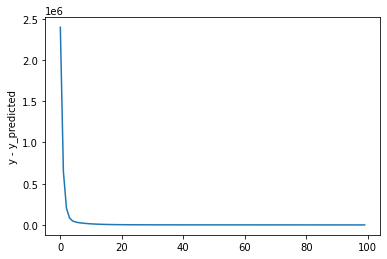

In [73]:
abs_p = abs_difference_p     
plt.plot(abs_p)
plt.ylabel('y - y_predicted')
plt.show()

With each iteration, the root mean square error of the loss function at previous and present calculated values of beta is decreasing.
Hence beta is getting better after each iteration.

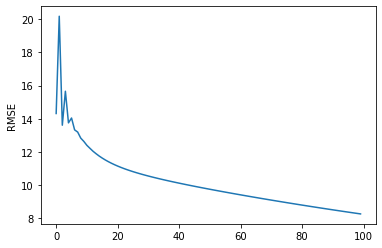

In [74]:
p_y = RMSE_p       
plt.plot(p_y)
plt.ylabel('RMSE')
plt.show()

# Exercise 3: Steplength Control for Gradient Descent

# Backtracking Line search

In [75]:
def backtracking(X, Y, x_t, y_t, beta, a, b):
    alpha = 1
    m, n = np.shape(X)
    m_t, n_t = np.shape(x_t)
    beta_new = np.zeros(n)
    diff = []
    Rmse = []
    for j in range(n):
        beta_new[j] = beta[j] - alpha*(grad_loss(X, Y, beta)[j]) 
    while loss(X, Y, beta_new) > (loss(X, Y, beta) - a*alpha*np.dot(grad_loss(X, Y, beta), grad_loss(X, Y, beta))):
        s = 0
        beta = np.array(beta_new)                          
        for j in range(n):
            beta_new[j] = beta[j] - alpha*(grad_loss(X, Y, beta)[j])
        diff.append(abs(loss(X, Y, beta) - loss(X, Y, beta_new)))
        for k in range(m_t):
            s += (np.dot(x_t[k], beta_new) - y_t[k])**2
        Rmse.append(np.sqrt(s/m))    
        alpha = alpha*b
    return alpha, diff, Rmse
        

# Backtracking to find alpha For the Wine_quality dataframe

In [76]:
backtracking(Wq_train_features, Wq_train_target, Wq_test_features, Wq_test_target, beta_Wq, 0.1, 0.01)[0]

1.0000000000000002e-10

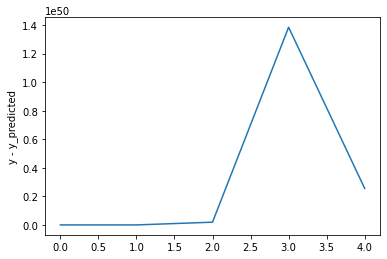

In [78]:
abs_dif_Wq = backtracking(Wq_train_features, Wq_train_target, Wq_test_features, Wq_test_target, beta_Wq, 0.1, 0.01)[1]     
plt.plot(abs_dif_Wq)
plt.ylabel('y - y_predicted')
plt.show()

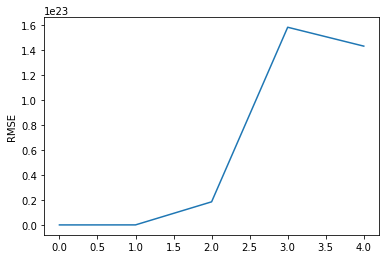

In [79]:
rmse_Wq = backtracking(Wq_train_features, Wq_train_target, Wq_test_features, Wq_test_target, beta_Wq, 0.1, 0.01)[2]     
plt.plot(rmse_Wq)
plt.ylabel('RMSE')
plt.show()

# Backtracking to find alpha For the airfare_price dataframe

In [80]:
backtracking(Ap_train_features, Ap_train_target, Ap_test_features, Ap_test_target, beta_Ap, 0.05, 0.001)[0]

KeyboardInterrupt: 

In [ ]:
abs_dif_Ap = backtracking(Ap_train_features, Ap_train_target, Ap_test_features, Ap_test_target, beta_Ap, 0.05, 0.001)[1]     
plt.plot(abs_dif_Ap)
plt.ylabel('y - y_predicted')
plt.show()

In [ ]:
rmse_Ap = backtracking(Ap_train_features, Ap_train_target, Ap_test_features, Ap_test_target, beta_Ap, 0.05, 0.001)[2]     
plt.plot(rmse_Ap)
plt.ylabel('RMSE')
plt.show()

# Backtracking to find alpha For the parkisons dataframe

In [81]:
backtracking(p_train_features, p_train_target, p_test_features, p_test_target, beta_p, 0.01, 0.001)[0]

1.0000000000000002e-12

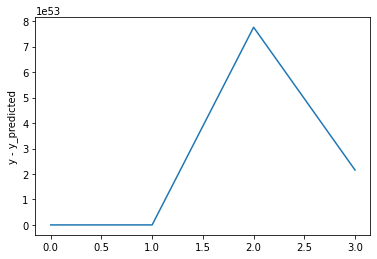

In [82]:
abs_dif_p = backtracking(p_train_features, p_train_target, p_test_features, p_test_target, beta_p, 0.01, 0.001)[1]     
plt.plot(abs_dif_p)
plt.ylabel('y - y_predicted')
plt.show()

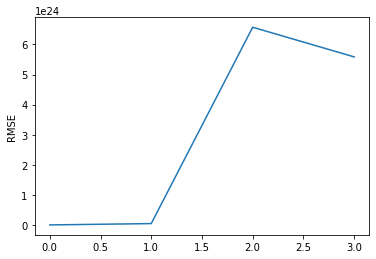

In [83]:
rmse_p = backtracking(p_train_features, p_train_target, p_test_features, p_test_target, beta_p, 0.05, 0.001)[2]     
plt.plot(rmse_p)
plt.ylabel('RMSE')
plt.show()

# steplength-bolddriver

In [86]:
def boldDriver(X, Y, x_t, y_t, beta, alpha_old, a, b):
    alpha = alpha_old*a
    m, n = np.shape(X)
    m_t, n_t = np.shape(x_t)
    beta_new = np.zeros(n)
    diff = []
    Rmse = []
    for j in range(n):
        beta_new[j] = beta[j] - alpha*(grad_loss(X, Y, beta)[j]) 
    while loss(X, Y, beta) - loss(X, Y, beta_new) <= 0:
        s = 0
        beta = np.array(beta_new)                          
        for j in range(n):
            beta_new[j] = beta[j] - alpha*(grad_loss(X, Y, beta)[j])
        diff.append(abs(loss(X, Y, beta) - loss(X, Y, beta_new)))
        for k in range(m_t):
            s += (np.dot(x_t[k], beta_new) - y_t[k])**2
        Rmse.append(np.sqrt(s/m))    
        alpha = alpha*b
    return alpha, diff, Rmse

# BoldDriver to find alpha For the Wine_quality dataframe

In [87]:
boldDriver(Wq_train_features, Wq_train_target, Wq_test_features, Wq_test_target, beta_Wq, 0.1, 0.05, 0.001)[0]

5.000000000000002e-12

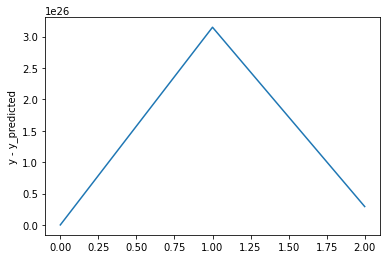

In [88]:
bd_diff_Wq = boldDriver(Wq_train_features, Wq_train_target, Wq_test_features, Wq_test_target, beta_Wq, 0.1, 0.05, 0.001)[1]
plt.plot(bd_diff_Wq)
plt.ylabel('y - y_predicted')
plt.show()

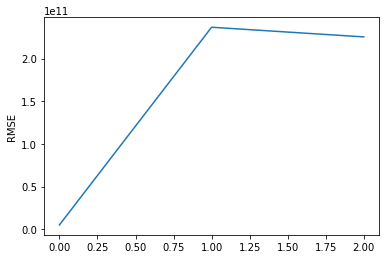

In [89]:
bd_rmse_Wq = boldDriver(Wq_train_features, Wq_train_target, Wq_test_features, Wq_test_target, beta_Wq, 0.1, 0.05, 0.001)[2]
plt.plot(bd_rmse_Wq)
plt.ylabel('RMSE')
plt.show()

# BoldDriver to find alpha For the airfare_price dataframe

In [ ]:
boldDriver(Ap_train_features, Ap_train_target, Ap_test_features, Ap_test_target, beta_Ap,0.01, 0.05, 0.001)[0]

In [ ]:
abs_dif_Ap = boldDriver(Ap_train_features, Ap_train_target, Ap_test_features, Ap_test_target, beta_Ap,0.01, 0.05, 0.001)[1]     
plt.plot(abs_dif_Ap)
plt.ylabel('y - y_predicted')
plt.show()

In [ ]:
rmse_Ap = boldDriver(Ap_train_features, Ap_train_target, Ap_test_features, Ap_test_target, beta_Ap, 0.01, 0.05, 0.001)[2]
plt.plot(zz)
plt.ylabel('RMSE')
plt.show()

# BoldDriver to find alpha For the parkisons dataframe

In [90]:
boldDriver(p_train_features, p_train_target, p_test_features, p_test_target, beta_p, 0.01, 0.05, 0.001)[0]

5.000000000000001e-13

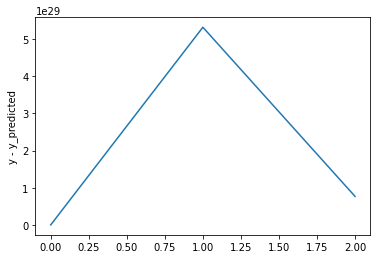

In [91]:
abs_dif_p = boldDriver(p_train_features, p_train_target, p_test_features, p_test_target, beta_p, 0.01, 0.05, 0.001)[1]     
plt.plot(abs_dif_p)
plt.ylabel('y - y_predicted')
plt.show()

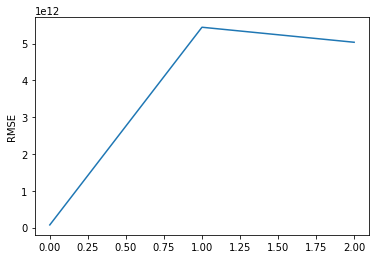

In [92]:
rmse_p = boldDriver(p_train_features, p_train_target, p_test_features, p_test_target, beta_p, 0.01, 0.05, 0.001)[2]
plt.plot(rmse_p)
plt.ylabel('RMSE')
plt.show()

# Look-ahead optimizer

In [ ]:
def lookahead(initial theta, loss func, k, slow weights phi step size alpha, gradient descent):
    for outer loop:
        phi's are stored in theta
        for loop for k steps ahead:
            on minibatch d from data D
            new theta = old theta + gradient descent(loss func, old theta, d)
        new phi = old phi + alpha*(theta at the end of k iteration - old phi)   
            
    return phi